In [7]:
%matplotlib widget

import pickle
import pandas as pd
import dtale
import datetime
import matplotlib.pyplot as plt
import tabloo

In [19]:
with open('treasuries.pkl', 'rb') as f:
  data = pickle.load(f)

df = pd.DataFrame(data)
df.columns = ['date','cusip','description','coupon','maturity','call','buy','sell','end-of-day-price']
df = df.drop(['description','call','buy','sell'], axis=1)
df['end-of-day-price'] = df['end-of-day-price'].astype('float')
df['coupon'] = [float(i[0:-1]) for i in df['coupon']]
df['maturity'] = [datetime.datetime.strptime(i,'%m/%d/%Y') for i in df['maturity']]
print(len(df))

720049


In [ ]:
dtale.show(df)

In [18]:
year = 2023
month = 9
day = 21

cusipList = list(set(df[df['maturity'] == datetime.datetime(year=year, month=month, day=day)]['cusip']))
cusipList

['912796CR8']

In [5]:
cusip = cusipList[0]

thisTreasury = df[df['cusip'] == cusip].sort_values('date')
dtale.show(thisTreasury)

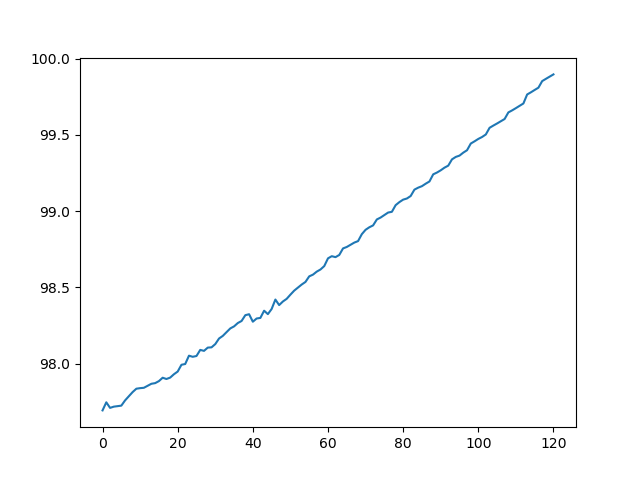

In [6]:
plt.plot(thisTreasury['end-of-day-price'].to_numpy()[0:-1])
plt.show()

In [13]:
temp = {i:df[df['cusip'] == i]['date'].min() for i in set(df['cusip'])}